# 1) Standard imports

In [108]:
import numpy as np 
import pandas as pd 
import re
import urlextract
import xlrd


# For Preprocesssing Text Data


from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer


# Check Performance
from sklearn.metrics import classification_report

# 2)Importing Data

In [109]:
train = pd.read_excel(r"Youtube_Balenciaga.xlsx")

In [110]:
train.head()

,Comment Number,Reply Number,Like Count,Published At,Text
0,1.0,NaN,0,2023-02-24T21:49:40Z,Thank you for this.
1,2.0,NaN,0,2023-02-24T18:56:11Z,"That wasn't an apology, it was one excuse afte..."
2,3.0,NaN,0,2023-02-23T00:40:54Z,Those are probably children that are trafficke...
3,4.0,NaN,0,2023-02-23T00:40:49Z,Those are probably children that are trafficke...
4,5.0,NaN,0,2023-02-19T13:26:47Z,Epstein and his group of elitists abused their...


In [111]:
train.shape[0]

26530

In [112]:
##Replace 'Text' column to 'Comments'

train.rename(columns = {'Text':'Comments'}, inplace = True)

In [113]:
train.columns

Index(['Comment Number', 'Reply Number', 'Like Count', 'Published At',
       'Comments'],
      dtype='object')

# 3)Comments - Descriptive Stats

In [114]:
train[train.columns[-1]].count()

26529

In [115]:
train.isna().sum()

Comment Number     5264
Reply Number      21266
Like Count            0
Published At          0
Comments              1
dtype: int64

In [116]:
# Null rows detection

null_rows = train[train['Comments'].isnull()]

print(null_rows)

       Comment Number  Reply Number  Like Count          Published At Comments
17229          5640.0           NaN           0  2022-11-23T05:49:29Z      NaN


In [117]:
train.shape

(26530, 5)

In [118]:
train['Comments'] = train['Comments'].astype(str)

In [119]:
### Create Length Feature

train['text_length'] = train['Comments'].apply(lambda x : len(x))

<AxesSubplot:ylabel='Frequency'>

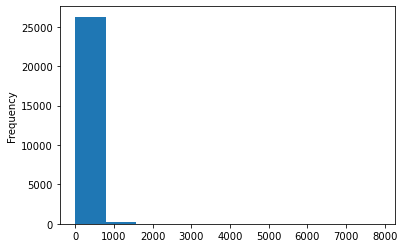

In [120]:
train['text_length'].plot.hist(bins = 10)

# 4) Cleaning - URL & Punctuation Removal

In [121]:
# URLs removal and extra spaces too

train['Comments'] = train['Comments'].apply(lambda x: re.sub(r'https?\S+', '', x).strip())

In [122]:
train.head(10)

,Comment Number,Reply Number,Like Count,Published At,Comments,text_length
0,1.0,NaN,0,2023-02-24T21:49:40Z,Thank you for this.,19
1,2.0,NaN,0,2023-02-24T18:56:11Z,"That wasn't an apology, it was one excuse afte...",56
2,3.0,NaN,0,2023-02-23T00:40:54Z,Those are probably children that are trafficke...,77
3,4.0,NaN,0,2023-02-23T00:40:49Z,Those are probably children that are trafficke...,77
4,5.0,NaN,0,2023-02-19T13:26:47Z,Epstein and his group of elitists abused their...,331
5,6.0,NaN,0,2023-02-19T05:21:41Z,"The blind could see there is an evil attack, a...",104
6,7.0,NaN,0,2023-02-18T20:09:59Z,Another thing I found is in one of the child a...,790
7,8.0,NaN,0,2023-02-18T14:54:31Z,They are sorry they got caught,30
8,9.0,NaN,0,2023-02-17T23:17:16Z,Madeleine McCann used to carry a teddy bear ar...,72
9,10.0,NaN,0,2023-02-17T19:54:57Z,Wyta. weird sex things is and has always been ...,126


In [123]:
##Remove punctuation

import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [124]:
train['Comments'].apply(remove_punctuations)

0                                       Thank you for this
1        That wasnt an apology it was one excuse after ...
2        Those are probably children that are trafficke...
3        Those are probably children that are trafficke...
4        Epstein and his group of elitists abused their...
                               ...                        
26525    LOL Dolls are creepy too I saw a video in the ...
26526    Blaire you are beautiful you should NEVER be a...
26527    If a person sees what is under the rug here an...
26528    Again GIRLYES When someone tells you who they ...
26529    Omg Im too broke to buy fashion like this I do...
Name: Comments, Length: 26530, dtype: object

In [125]:
# Commit to Table
train['Comments'] = train['Comments'].apply(remove_punctuations)

<AxesSubplot:ylabel='Frequency'>

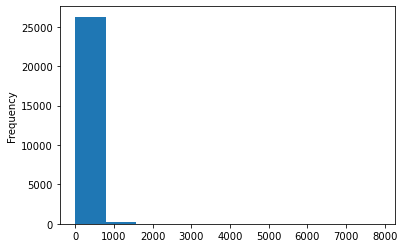

In [126]:
train['text_length'].plot.hist(bins = 10)

# 4) Cleaning - lower case

In [127]:
# Showing only
train['Comments'].apply(lambda x: x.lower())

0                                       thank you for this
1        that wasnt an apology it was one excuse after ...
2        those are probably children that are trafficke...
3        those are probably children that are trafficke...
4        epstein and his group of elitists abused their...
                               ...                        
26525    lol dolls are creepy too i saw a video in the ...
26526    blaire you are beautiful you should never be a...
26527    if a person sees what is under the rug here an...
26528    again girlyes when someone tells you who they ...
26529    omg im too broke to buy fashion like this i do...
Name: Comments, Length: 26530, dtype: object

In [128]:
# Commit to Table
train['Comments'] = train['Comments'].apply(lambda x: x.lower())

In [129]:
train.head(20)

,Comment Number,Reply Number,Like Count,Published At,Comments,text_length
0,1.0,NaN,0,2023-02-24T21:49:40Z,thank you for this,19
1,2.0,NaN,0,2023-02-24T18:56:11Z,that wasnt an apology it was one excuse after ...,56
2,3.0,NaN,0,2023-02-23T00:40:54Z,those are probably children that are trafficke...,77
3,4.0,NaN,0,2023-02-23T00:40:49Z,those are probably children that are trafficke...,77
4,5.0,NaN,0,2023-02-19T13:26:47Z,epstein and his group of elitists abused their...,331
5,6.0,NaN,0,2023-02-19T05:21:41Z,the blind could see there is an evil attack a ...,104
6,7.0,NaN,0,2023-02-18T20:09:59Z,another thing i found is in one of the child a...,790
7,8.0,NaN,0,2023-02-18T14:54:31Z,they are sorry they got caught,30
8,9.0,NaN,0,2023-02-17T23:17:16Z,madeleine mccann used to carry a teddy bear ar...,72
9,10.0,NaN,0,2023-02-17T19:54:57Z,wyta weird sex things is and has always been a...,126


# 5) Cleaning - Remove Stopwords & emoticons & special characters

In [130]:
# Get Stopwords
stop = stopwords.words('english')

In [131]:
# Tokenize and Remove Stop Words
train['Comments'].apply(lambda x: [word for word in x.split() if word not in stop])

0                                                  [thank]
1                   [wasnt, apology, one, excuse, another]
2        [probably, children, trafficked, entertainment...
3        [probably, children, trafficked, entertainment...
4        [epstein, group, elitists, abused, power, saw,...
                               ...                        
26525    [lol, dolls, creepy, saw, video, past, put, co...
26526    [blaire, beautiful, never, billboard, brand, m...
26527    [person, sees, rug, denounce, part, problem, r...
26528    [girlyes, someone, tells, absolutely, believe,...
26529    [omg, im, broke, buy, fashion, like, dont, rea...
Name: Comments, Length: 26530, dtype: object

In [132]:
train['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

0                                                    thank
1                         wasnt apology one excuse another
2        probably children trafficked entertainment ind...
3        probably children trafficked entertainment ind...
4        epstein group elitists abused power saw girls ...
                               ...                        
26525    lol dolls creepy saw video past put cold water...
26526    blaire beautiful never billboard brand must fi...
26527    person sees rug denounce part problem rl thing...
26528    girlyes someone tells absolutely believe im se...
26529    omg im broke buy fashion like dont read fashio...
Name: Comments, Length: 26530, dtype: object

In [133]:
# Join the words back
train['Comments'] = train['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [134]:
train.head(10)

,Comment Number,Reply Number,Like Count,Published At,Comments,text_length
0,1.0,NaN,0,2023-02-24T21:49:40Z,thank,19
1,2.0,NaN,0,2023-02-24T18:56:11Z,wasnt apology one excuse another,56
2,3.0,NaN,0,2023-02-23T00:40:54Z,probably children trafficked entertainment ind...,77
3,4.0,NaN,0,2023-02-23T00:40:49Z,probably children trafficked entertainment ind...,77
4,5.0,NaN,0,2023-02-19T13:26:47Z,epstein group elitists abused power saw girls ...,331
5,6.0,NaN,0,2023-02-19T05:21:41Z,blind could see evil attack demonic war waged ...,104
6,7.0,NaN,0,2023-02-18T20:09:59Z,another thing found one child ads thereâ€™s ki...,790
7,8.0,NaN,0,2023-02-18T14:54:31Z,sorry got caught,30
8,9.0,NaN,0,2023-02-17T23:17:16Z,madeleine mccann used carry teddy bear around ...,72
9,10.0,NaN,0,2023-02-17T19:54:57Z,wyta weird sex things always right w thing lef...,126


In [135]:
##Remove emoticons

def remove_emoticons(text):
    emoticon_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\u2764"  
        u"\U0001F644"                            
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                                  
                           "]+", flags=re.UNICODE)
    return emoticon_pattern.sub(r'', text)



In [136]:

# Apply the remove_emoticons function to the 'Comments' column
train['Comments'] = train['Comments'].apply(remove_emoticons)

In [137]:
train.head(20)

,Comment Number,Reply Number,Like Count,Published At,Comments,text_length
0,1.0,NaN,0,2023-02-24T21:49:40Z,thank,19
1,2.0,NaN,0,2023-02-24T18:56:11Z,wasnt apology one excuse another,56
2,3.0,NaN,0,2023-02-23T00:40:54Z,probably children trafficked entertainment ind...,77
3,4.0,NaN,0,2023-02-23T00:40:49Z,probably children trafficked entertainment ind...,77
4,5.0,NaN,0,2023-02-19T13:26:47Z,epstein group elitists abused power saw girls ...,331
5,6.0,NaN,0,2023-02-19T05:21:41Z,blind could see evil attack demonic war waged ...,104
6,7.0,NaN,0,2023-02-18T20:09:59Z,another thing found one child ads thereâ€™s ki...,790
7,8.0,NaN,0,2023-02-18T14:54:31Z,sorry got caught,30
8,9.0,NaN,0,2023-02-17T23:17:16Z,madeleine mccann used carry teddy bear around ...,72
9,10.0,NaN,0,2023-02-17T19:54:57Z,wyta weird sex things always right w thing lef...,126


In [138]:
##Remove non-ASCII improperly encoded characters

def remove_invalid_chars(text):
    # encode the text string using ASCII encoding
    encoded_text = text.encode('ascii', 'ignore')
    # decode the encoded text using ASCII encoding
    decoded_text = encoded_text.decode('ascii')
    return decoded_text

In [139]:
# apply the remove_invalid_chars function to the 'Comments' column
train['Comments'] = train['Comments'].apply(remove_invalid_chars)



In [140]:
train.head(20)

,Comment Number,Reply Number,Like Count,Published At,Comments,text_length
0,1.0,NaN,0,2023-02-24T21:49:40Z,thank,19
1,2.0,NaN,0,2023-02-24T18:56:11Z,wasnt apology one excuse another,56
2,3.0,NaN,0,2023-02-23T00:40:54Z,probably children trafficked entertainment ind...,77
3,4.0,NaN,0,2023-02-23T00:40:49Z,probably children trafficked entertainment ind...,77
4,5.0,NaN,0,2023-02-19T13:26:47Z,epstein group elitists abused power saw girls ...,331
5,6.0,NaN,0,2023-02-19T05:21:41Z,blind could see evil attack demonic war waged ...,104
6,7.0,NaN,0,2023-02-18T20:09:59Z,another thing found one child ads theres kids ...,790
7,8.0,NaN,0,2023-02-18T14:54:31Z,sorry got caught,30
8,9.0,NaN,0,2023-02-17T23:17:16Z,madeleine mccann used carry teddy bear around ...,72
9,10.0,NaN,0,2023-02-17T19:54:57Z,wyta weird sex things always right w thing lef...,126


# 6)Lemmatize

In [141]:
import nltk

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [142]:
from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()

In [143]:
# Lemmatize
train['Comments'].apply(lambda x: lemmatizer.lemmatize(x))

0                                                    thank
1                         wasnt apology one excuse another
2        probably children trafficked entertainment ind...
3        probably children trafficked entertainment ind...
4        epstein group elitists abused power saw girls ...
                               ...                        
26525    lol dolls creepy saw video past put cold water...
26526    blaire beautiful never billboard brand must fi...
26527    person sees rug denounce part problem rl thing...
26528    girlyes someone tells absolutely believe im se...
26529    omg im broke buy fashion like dont read fashio...
Name: Comments, Length: 26530, dtype: object

In [144]:
# Commit to Table

train['Comments'] = train['Comments'].apply(lambda x: lemmatizer.lemmatize(x))

## 7) POS Tagging

In [145]:
# Download the required NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [146]:
def pos_tagging(text):
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    # Perform POS tagging
    tagged_tokens = nltk.pos_tag(tokens)
    # Return the tagged tokens
    return tagged_tokens

In [147]:
# Apply the POS tagging function to the 'Comments' column
train['POS_Tagged'] = train['Comments'].apply(pos_tagging)

In [148]:
train['POS_Tagged']

0                                            [(thank, NN)]
1        [(wasnt, NN), (apology, NN), (one, CD), (excus...
2        [(probably, RB), (children, NNS), (trafficked,...
3        [(probably, RB), (children, NNS), (trafficked,...
4        [(epstein, NN), (group, NN), (elitists, VBZ), ...
                               ...                        
26525    [(lol, NN), (dolls, NNS), (creepy, VBP), (saw,...
26526    [(blaire, NN), (beautiful, NN), (never, RB), (...
26527    [(person, NN), (sees, NNS), (rug, VBP), (denou...
26528    [(girlyes, NNS), (someone, NN), (tells, VBZ), ...
26529    [(omg, NN), (im, NN), (broke, VBD), (buy, JJ),...
Name: POS_Tagged, Length: 26530, dtype: object